In [3]:
import json
import scipy.spatial.distance as ssd
f=open('taxi_requests.json')
data = json.load(f)
f.close()

times=data['request_time']
times

['1970-01-01 20:13:18',
 '1970-01-01 20:16:10',
 '1970-01-01 20:16:37',
 '1970-01-01 20:16:36',
 '1970-01-01 20:26:21',
 '1970-01-01 20:21:41',
 '1970-01-01 20:12:16',
 '1970-01-01 20:35:47',
 '1970-01-01 20:35:38',
 '1970-01-01 20:47:52',
 '1970-01-01 20:26:05',
 '1970-01-01 20:31:03',
 '1970-01-01 20:34:46',
 '1970-01-01 20:36:34',
 '1970-01-01 20:39:25',
 '1970-01-01 20:40:37',
 '1970-01-01 20:34:58',
 '1970-01-01 20:43:59',
 '1970-01-01 20:47:46',
 '1970-01-01 20:46:34',
 '1970-01-01 20:56:07',
 '1970-01-01 20:49:12',
 '1970-01-01 20:59:06',
 '1970-01-01 20:59:59',
 '1970-01-01 21:15:01',
 '1970-01-01 21:09:24',
 '1970-01-01 21:19:24',
 '1970-01-01 21:20:53',
 '1970-01-01 21:29:19',
 '1970-01-01 21:58:05',
 '1970-01-01 21:51:51',
 '1970-01-01 21:59:40',
 '1970-01-01 22:08:34',
 '1970-01-01 22:02:51',
 '1970-01-01 21:58:32',
 '1970-01-01 22:02:31',
 '1970-01-01 22:05:32',
 '1970-01-01 22:02:46',
 '1970-01-01 22:10:28',
 '1970-01-01 22:11:58',
 '1970-01-01 22:01:05',
 '1970-01-01 22:

In [5]:
from datetime import datetime
import time
from datetime import timezone
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# timestamps=[time.mktime(datetime.strptime(login_times[i],'%Y-%m-%d %H:%M:%S').timetuple()) for i in range(len(login_times))]
timestamps=[datetime.strptime(login_times[i], '%Y-%m-%d %H:%M:%S').replace(tzinfo=timezone.utc).timestamp() for i in range(len(login_times))]
timestamps

[72798.0,
 72970.0,
 72997.0,
 72996.0,
 73581.0,
 73301.0,
 72736.0,
 74147.0,
 74138.0,
 74872.0,
 73565.0,
 73863.0,
 74086.0,
 74194.0,
 74365.0,
 74437.0,
 74098.0,
 74639.0,
 74866.0,
 74794.0,
 75367.0,
 74952.0,
 75546.0,
 75599.0,
 76501.0,
 76164.0,
 76764.0,
 76853.0,
 77359.0,
 79085.0,
 78711.0,
 79180.0,
 79714.0,
 79371.0,
 79112.0,
 79351.0,
 79532.0,
 79366.0,
 79828.0,
 79918.0,
 79265.0,
 80350.0,
 80214.0,
 80252.0,
 79925.0,
 80583.0,
 80534.0,
 80709.0,
 80644.0,
 80399.0,
 81092.0,
 83171.0,
 82556.0,
 83229.0,
 83516.0,
 83075.0,
 83068.0,
 83571.0,
 83285.0,
 83497.0,
 83371.0,
 82675.0,
 83640.0,
 83346.0,
 83251.0,
 83353.0,
 82585.0,
 83395.0,
 83914.0,
 83362.0,
 84090.0,
 83265.0,
 84205.0,
 83771.0,
 84125.0,
 83868.0,
 84253.0,
 84352.0,
 84816.0,
 84660.0,
 84043.0,
 84371.0,
 84066.0,
 84419.0,
 84637.0,
 85104.0,
 85085.0,
 84834.0,
 84632.0,
 85541.0,
 85405.0,
 85044.0,
 84901.0,
 85402.0,
 85977.0,
 85656.0,
 85500.0,
 84432.0,
 85534.0,
 85487.0,


In [6]:
days={'Sunday':0,
      'Monday':0,
      'Tuesday':0,
      'Wednesday':0,
      'Thursday':0,
      'Friday':0,
      'Saturday':0
     }

for i in data['request_time']:
    
    i=pd.Timestamp(i)
    day=i.day_name()
    if(day=='Sunday'):
        days['Sunday']+=1
    elif(day=='Monday'):
        days['Monday']+=1
    elif(day=='Tuesday'):
        days['Tuesday']+=1   
    elif(day=='Wednesday'):
        days['Wednesday']+=1  
    elif(day=='Thursday'):
        days['Thursday']+=1  
    elif(day=='Friday'):
        days['Friday']+=1  
    elif(day=='Saturday'):
        days['Saturday']+=1 
        
print(days)

{'Sunday': 18167, 'Monday': 8823, 'Tuesday': 9268, 'Wednesday': 10339, 'Thursday': 11960, 'Friday': 15208, 'Saturday': 19377}


## 2- Which date was the busiest date (the day with the most requests)? Which date was the second busiest date?

## Solution_one

In [23]:
day_number=np.array(timestamps).astype(int)//(24*60*60)
day_number

array([  0,   0,   0, ..., 102, 102, 102], dtype=int32)

In [39]:
unique_date,count_date=np.unique(day_number,return_counts=True)
count_date

array([ 112,  681,  793,  788,  459,  536,  648,  625,  881, 1054, 1014,
        536,  492,  547,  624,  789, 1064,  971,  469,  531,  523,  605,
        845,  926,  852,  462,  565,  657,  674,  711,  805,  870,  599,
        464,  467,  688,  990, 1102, 1262,  514,  590,  719,  842,  935,
       1173, 1142,  589,  690,  762,  946, 1139, 1479, 1430,  653,  642,
        722,  841, 1028, 1395, 1273,  637,  714,  893,  914, 1140, 1666,
       1434,  619,  644,  778,  827, 1199, 1706, 1565,  837, 1290, 1212,
       1444, 1215, 1485, 1472,  735,  750,  774,  873, 1142, 1488, 1523,
        704,  770,  939, 1127, 1504, 1889, 1162,  615,  590,  698,  818,
       1009, 1352, 1409,  395], dtype=int64)

In [41]:
maxday_arg=np.argmax(count_date)

In [42]:
print('busiest day',unique_date[maxday_arg])

busiest day 93


## Solution_two

In [54]:
day_number_two=[]
for i in data['request_time']:
    i=pd.Timestamp(i)
    day_number_two.append(i.date())
    
day_number_two    

[datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970, 1, 1),
 datetime.date(1970,

In [96]:
unique_day_two,count_day_two=np.unique(day_number_two,return_counts=True)
count_day_two

array([ 112,  681,  793,  788,  459,  536,  648,  625,  881, 1054, 1014,
        536,  492,  547,  624,  789, 1064,  971,  469,  531,  523,  605,
        845,  926,  852,  462,  565,  657,  674,  711,  805,  870,  599,
        464,  467,  688,  990, 1102, 1262,  514,  590,  719,  842,  935,
       1173, 1142,  589,  690,  762,  946, 1139, 1479, 1430,  653,  642,
        722,  841, 1028, 1395, 1273,  637,  714,  893,  914, 1140, 1666,
       1434,  619,  644,  778,  827, 1199, 1706, 1565,  837, 1290, 1212,
       1444, 1215, 1485, 1472,  735,  750,  774,  873, 1142, 1488, 1523,
        704,  770,  939, 1127, 1504, 1889, 1162,  615,  590,  698,  818,
       1009, 1352, 1409,  395], dtype=int64)

In [37]:
maxday_two_arg=np.argmax(count_day_two)
maxday_two_arg

93

In [93]:
print('busiest day',unique_day_two[maxday_two_arg])

busiest day 1970-04-04


In [97]:
max_count=max(count_day_two)
max_count

1889

## second busiest date

In [109]:
sec_max=0
for i in count_date:
    if ((i>sec_max) & (i!=max_count)):
        sec_max=i
        
    
ind=np.where(count_day_two==sec_max)   
print()    

In [110]:
print('busiest day',unique_day_two[ind])

busiest day [datetime.date(1970, 3, 14)]


## 3- Which hour was the busiest hour (the hour with the most requests)?

In [111]:
hour_number=[]
for i in data['request_time']:
    i=pd.Timestamp(i)
    hour_number.append(i.hour)
 

In [112]:
unique_hour,count_hour=np.unique(hour_number,return_counts=True)
count_hour

array([5993, 6317, 5800, 4831, 5034, 2945, 1138,  815,  818, 1527, 3064,
       5799, 4964, 3611, 3426, 3038, 2832, 2584, 2980, 3235, 4103, 5623,
       6607, 6058], dtype=int64)

In [20]:
maxhour=np.argmax(count_hour)
maxhour

22

In [21]:
print(unique_hour[maxhour])

22


## 4- Are there any two requests that happened at the same time?

In [89]:
for index,element in enumerate(data['request_time']):
      if index+1 < len(same_request):
            frs_time=pd.Timestamp(data['request_time'][index])
            sec_time=pd.Timestamp(data['request_time'][index+1])
           
            if((frs_time.hour==sec_time.hour)&(frs_time.minute==sec_time.minute)&(frs_time.minute==sec_time.minute)&(frs_time.second==
                                                                                                             sec_time.second)):
                  print(sec_time.hour,'and',sec_time.minute,'and', sec_time.second,'index',index)
                  print(frs_time.hour,'and',frs_time.minute,'and', frs_time.second,'index two',index+1)

23 and 17 and 58 index 1545
23 and 17 and 58 index two 1546
5 and 29 and 28 index 2002
5 and 29 and 28 index two 2003
23 and 3 and 29 index 3978
23 and 3 and 29 index two 3979
4 and 50 and 26 index 4180
4 and 50 and 26 index two 4181
21 and 14 and 13 index 4479
21 and 14 and 13 index two 4480
11 and 28 and 23 index 5993
11 and 28 and 23 index two 5994
11 and 31 and 13 index 7815
11 and 31 and 13 index two 7816
11 and 59 and 21 index 7851
11 and 59 and 21 index two 7852
10 and 46 and 33 index 8255
10 and 46 and 33 index two 8256
11 and 59 and 50 index 8867
11 and 59 and 50 index two 8868
18 and 1 and 46 index 10283
18 and 1 and 46 index two 10284
18 and 44 and 52 index 10296
18 and 44 and 52 index two 10297
5 and 25 and 8 index 10999
5 and 25 and 8 index two 11000
3 and 55 and 21 index 15887
3 and 55 and 21 index two 15888
14 and 20 and 48 index 16169
14 and 20 and 48 index two 16170
7 and 12 and 43 index 17016
7 and 12 and 43 index two 17017
2 and 8 and 18 index 18491
2 and 8 and 18 in

In [63]:
unique_time,count_time=np.unique(time,return_counts=True)
unique_time

array(['00:00:00', '00:00:02', '00:00:04', ..., '23:59:57', '23:59:58',
       '23:59:59'], dtype='<U8')

In [86]:
data['request_time'][1545]

'1970-01-03 23:17:58'

In [116]:
data['request_time'][1546]

'1970-01-03 23:17:58'

## 5- What is the longest gap between two consequent requests?

In [118]:
longest_gap=np.array(timestamps).astype(int)
longest_gap

array([  72798,   72970,   72997, ..., 8880842, 8881058, 8880863])

In [121]:
distance=[]
for index,element in enumerate(longest_gap): 
    if index+1 < len(longest_gap):
        dis=abs(longest_gap[index+1]-element)
        distance.append(abs(longest_gap[index+1]-element))
        
        
longest_gap_amount=np.argmax(distance)
print(longest_gap_amount)

4401


## 6- Overall, does the volume of requests increase or decrease over time?

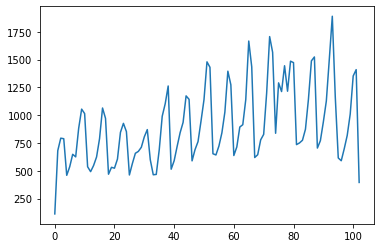

In [23]:
fig=plt.figure();
req_in_day=count_date
all_day=unique_date
plt.plot(all_day,req_in_day);